Dataset link
https://drive.google.com/file/d/1GS-8_EpmTliRE02OX8As7kfMm2hxdLbI/view?usp=sharing

 ## What are the chances of a customer buying a product based on their gender?

# **Bank Marketing Data Set**

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing


Attribute Information:

Input variables:

**Bank client data:**

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

**Related with the last contact of the current campaign:**

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


**Social and economic context attributes**

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Exploring and creating a logistic model using banking data:

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Create a DataFrame variable containing the banking data CSV file.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

pd.set_option('display.max_columns', None) #to show all columns when displaying dataframes, which allows you to view all the columns of a dataframe 
#in the output instead of truncating them with ellipses ("...").
bankData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning Algo/2. Logistic Regression/1. UCI Banking and Marketing data set /banking.csv')

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')



In [ ]:
# Explore the dataset and determine what the dependent variable (target array) is. 
print(bankData.head())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93

In [ ]:
print(bankData.shape)

(41188, 21)


In [ ]:
print(bankData.columns.values)

['age' 'job' 'marital' 'education' 'default' 'housing' 'loan' 'contact'
 'month' 'day_of_week' 'duration' 'campaign' 'pdays' 'previous' 'poutcome'
 'emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed'
 'y']


In [ ]:
print(bankData.isnull().sum())

#to calculate the number of missing (null) values in each column of the bankData dataframe. 
#The isnull() method is used to generate a boolean mask that indicates whether each element in the dataframe is null or missing. 
#The sum() method is then applied on this boolean mask to count the number of True values, which represents the number of missing values in each column.



age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


#### Data set has no missing values

In [ ]:
bankData.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Visualizing categorical variables

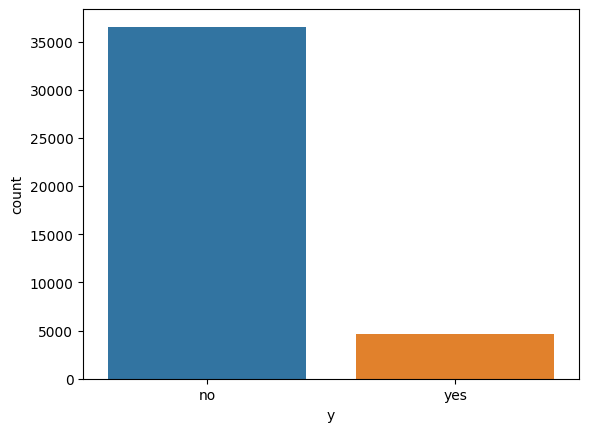

In [ ]:
# Labels against frequency 
plt.figure()
sb.countplot(x='y', data=bankData)

plt.show()

#to create a count plot to display the frequency of labels in the 'y' column of the bankData dataframe. 
#The countplot() function from seaborn is used to create the plot.

Majority of the people did not convert

Dataset is imbalanced 

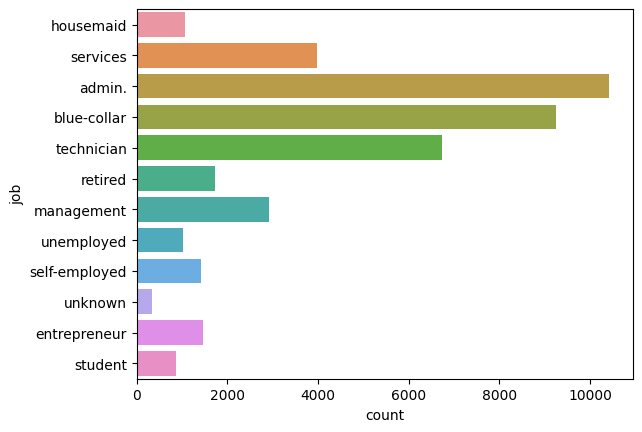

In [ ]:
# Distribution of Jobs
plt.figure()
sb.countplot(y='job', data=bankData)

plt.show()

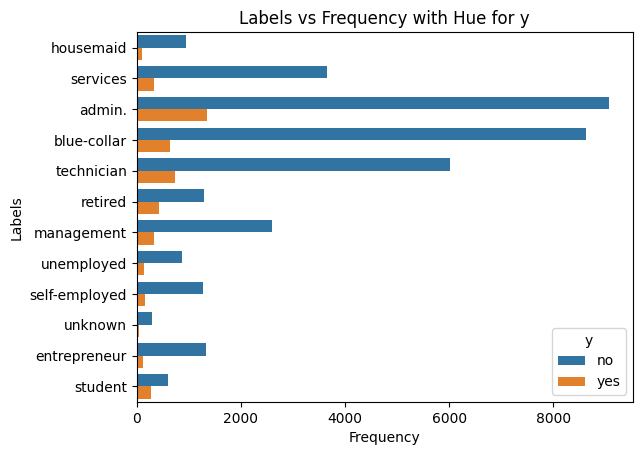

In [ ]:
# Create a countplot with hue for 'job' variable
sb.countplot(y='job', hue='y', data=bankData)

# Set the title and labels for the plot
plt.title("Labels vs Frequency with Hue for y")
plt.xlabel("Frequency")
plt.ylabel("Labels")

# Display the plot
plt.show()

In [ ]:
# Create a contingency table or crosstab between 'y' and 'job' columns
contingency_table = pd.crosstab(index=bankData['y'], columns=bankData['job'])

# Print the contingency table
print(contingency_table)

job  admin.  blue-collar  entrepreneur  housemaid  management  retired  \
y                                                                        
no     9070         8616          1332        954        2596     1286   
yes    1352          638           124        106         328      434   

job  self-employed  services  student  technician  unemployed  unknown  
y                                                                       
no            1272      3646      600        6013         870      293  
yes            149       323      275         730         144       37  


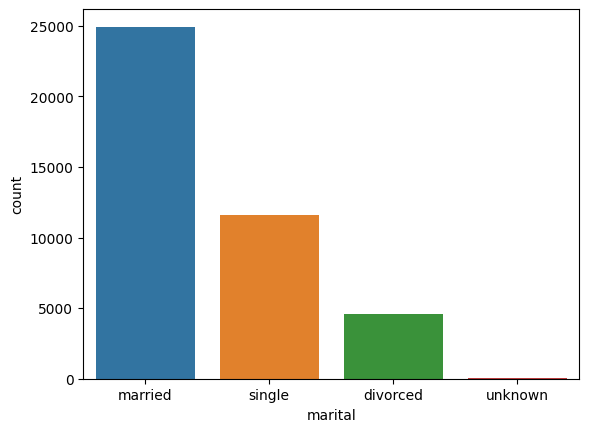

In [ ]:
# Distribution on marital status
plt.figure()
sb.countplot(x='marital', data=bankData)

plt.show()

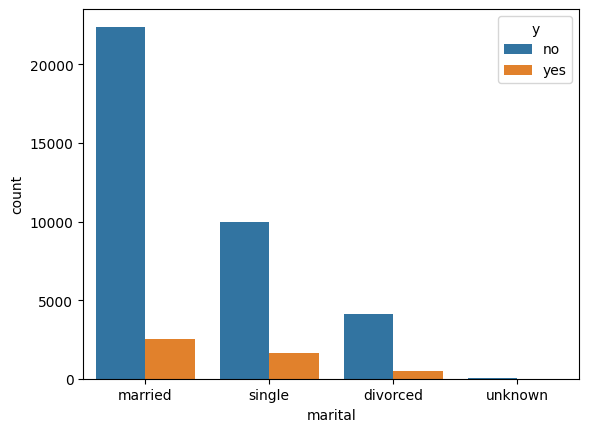

In [ ]:
# Distribution on marital status with y variable
plt.figure()
sb.countplot(x='marital', hue = 'y',data=bankData)

plt.show()

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [ ]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# Create dummy variables for all the categorical variables that you have kept.
df2 = pd.get_dummies(bankData, columns=['job', 'marital', 'default', 'housing', 'loan', 'poutcome', 'education','contact'])

In [ ]:
# Determine what features to include in the model. Remove the features you won’t include from the dataFrame.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   month                          41188 non-null  object 
 2   day_of_week                    41188 non-null  object 
 3   duration                       41188 non-null  int64  
 4   campaign                       41188 non-null  int64  
 5   pdays                          41188 non-null  int64  
 6   previous                       41188 non-null  int64  
 7   emp.var.rate                   41188 non-null  float64
 8   cons.price.idx                 41188 non-null  float64
 9   cons.conf.idx                  41188 non-null  float64
 10  euribor3m                      41188 non-null  float64
 11  nr.employed                    41188 non-null  float64
 12  y                              41188 non-null 

In [ ]:
# Drop one variable from each of the sets of dummy vraibles. No information will be lost.  
df2.drop( ['job_unknown', 'marital_unknown' , 'default_unknown', 'housing_unknown', 'loan_unknown' , 'poutcome_nonexistent'
          ,'education_unknown','contact_telephone'], axis=1, inplace = True )

#Drop variables that do might not have an impact on the output  
df2.drop( ['month', 'day_of_week'], axis=1, inplace = True )

In [ ]:
# check data types of all the variables. 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  object 
 11  job_admin.                     41188 non-null  uint8  
 12  job_blue-collar                41188 non-null 

In [ ]:
# converting y from 'yes' and 'no' to 1 and 0
df2['y'] = df2.y.map(dict(yes=1, no=0))

In [ ]:
df2.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'poutcome_failure',
       'poutcome_success', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'contact_cellular'],
      dtype='object')

#### Note all the variables are neumerical execpt for y

In [27]:
# Split the data into a training and test set. 

# All columns are features execpt for y
X = df2.loc[:, ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'poutcome_failure',
       'poutcome_success', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'contact_cellular']]

# y is the target variable
y = df2.loc[:, ['y']]

In [28]:
#import a prebuilt function to split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28831, 40)
(28831, 1)
(12357, 40)
(12357, 1)


In [29]:
# Fit your training data to a Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# diclare the logistic model
model = LogisticRegression()

# train the model on the data
model.fit(X_train, y_train)

LogisticRegression()

In [30]:
model.coef_

array([[ 3.35612645e-03,  4.48516777e-03, -7.03014269e-02,
        -1.68382998e-03,  1.76652280e-02, -2.60570316e-01,
         1.91198930e-01,  4.33968987e-02, -2.76041057e-01,
        -3.41974205e-03,  1.01953453e-02, -2.24321580e-02,
        -8.67187769e-04, -3.38101976e-04,  2.25105643e-03,
         8.62251566e-03, -3.41881307e-04, -5.59916958e-03,
         8.42126820e-03,  1.61956311e-03,  1.46527150e-03,
        -2.64316194e-03, -1.44415878e-02,  1.96619958e-02,
         2.77364044e-02, -3.21777407e-06, -2.01016053e-03,
         5.07875293e-03,  4.76626061e-03, -1.69766820e-03,
         7.29905521e-03,  3.19444137e-03, -4.59508986e-03,
        -3.91611133e-03, -9.81652194e-03, -2.24277020e-03,
         1.34250864e-04,  1.38931264e-03,  1.94249120e-02,
         4.03348105e-02]])

In [ ]:
model.coef_.shape

(1, 40)

In [39]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
# Use the testing data to make predictions and determine the accuracy of your predictions.
y_pred = model.predict(X_test)

from sklearn import metrics
print("Accuracy is: ",metrics.accuracy_score(y_test, y_pred))

# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)


Accuracy is:  0.911143481427531
[[10700   269]
 [  829   559]]


In [45]:
# Calculating a base line for comparing the model. 
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [46]:
y_pred = dummy_clf.predict(X_test)

# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)


[[10969     0]
 [ 1388     0]]


#### Plot ROC Score

In [49]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.9234347360376096

The AUC-ROC score is commonly used to evaluate the performance of binary classification models because it is less sensitive to class imbalance and provides a comprehensive evaluation of the classifier's ability to discriminate between the positive and negative classes across different thresholds. Higher AUC-ROC scores indicate better classification performance, while lower scores indicate poorer performance.

In [63]:
from sklearn.metrics import roc_curve

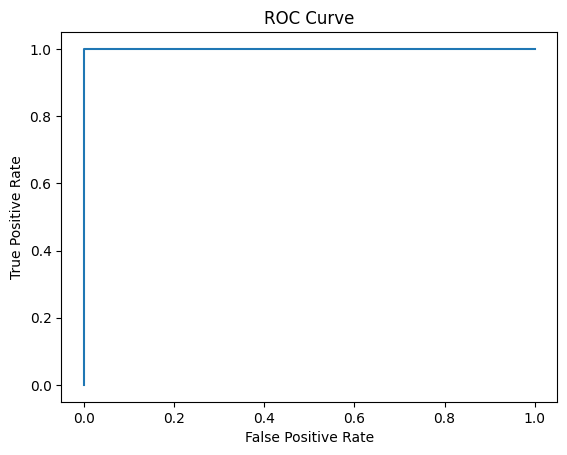

In [65]:
# Compute ROC curve
y_scores = model.predict_proba(X_test)[:, 1]
# Get true labels (ground truth) for the test data
y_true = y_test

fpr, tpr, thresholds = roc_curve(y_true, y_test)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#Something is wrong here, we need to check